# Relax Inc. Challenge

Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday
period , identify which factors predict future user
adoption .

## Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\eboci_000\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### User Engagement Data

In [2]:
engage = pd.read_csv('takehome_user_engagement.csv')
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [4]:
#Convert time_stamp to datetime.
engage.time_stamp = pd.to_datetime(engage.time_stamp)

In [5]:
engage.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

### Users Data

In [6]:
users = pd.read_csv('takehome_users.csv')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [8]:
#Convert creation_time, last_session_creation_time to datetime
users.creation_time = pd.to_datetime(users.creation_time)
users.last_session_creation_time = pd.to_datetime(
    users.last_session_creation_time)

In [9]:
users.dtypes

object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
dtype: object

In [10]:
#Drop email and name columns. They are identifier columns.
#Will not contribute useful insight.
users = users.drop(['email', 'name'], axis=1)

In [11]:
#Create dummy variables for creation_source, 
#the only non-numerical category.
cs = pd.get_dummies(users.creation_source)
users = pd.concat([users, cs], axis=1)

In [12]:
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,1,0,0,0,0
1,2,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,0,1,0,0,0
2,3,2013-03-19 23:14:52,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,0,1,0,0,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,1,0,0,0,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,1,0,0,0,0


### Merge Tables

In [13]:
users = users.rename(columns={'object_id' : 'user_id'})
df = pd.merge(users, engage, on='user_id')
df.head()

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,time_stamp,visited
0,1,2014-04-22 03:53:30,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,1,0,0,0,0,2014-04-22 03:53:30,1
1,2,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,0,1,0,0,0,2013-11-15 03:45:04,1
2,2,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,0,1,0,0,0,2013-11-29 03:45:04,1
3,2,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,0,1,0,0,0,2013-12-09 03:45:04,1
4,2,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,0,1,0,0,0,2013-12-25 03:45:04,1


### Adopted

In [14]:
#Only need user_id and time_stamp to count activity within a week.
counting = df[['user_id','time_stamp']].sort_values(by=['user_id','time_stamp'])
counting['counts'] = counting.groupby('user_id').transform('count')
counting.head()

,user_id,time_stamp,counts
0,1,2014-04-22 03:53:30,1
1,2,2013-11-15 03:45:04,14
2,2,2013-11-29 03:45:04,14
3,2,2013-12-09 03:45:04,14
4,2,2013-12-25 03:45:04,14


In [15]:
#Filter for 3 or more.
counting = counting[counting['counts'] >= 3]
counting.head()

,user_id,time_stamp,counts
1,2,2013-11-15 03:45:04,14
2,2,2013-11-29 03:45:04,14
3,2,2013-12-09 03:45:04,14
4,2,2013-12-25 03:45:04,14
5,2,2013-12-31 03:45:04,14


In [16]:
#Set index to time_stamp.
counting = counting.set_index('time_stamp')
counting.head()

,user_id,counts
time_stamp,,
2013-11-15 03:45:04,2,14
2013-11-29 03:45:04,2,14
2013-12-09 03:45:04,2,14
2013-12-25 03:45:04,2,14
2013-12-31 03:45:04,2,14


In [17]:
#Group by week.
counting = counting.groupby('user_id').rolling('7D').count()[lambda x: x.counts >= 3]
counting.head()

user_id  counts
user_id time_stamp                          
2       2014-02-09 03:45:04      3.0     3.0
        2014-02-13 03:45:04      3.0     3.0
10      2013-02-19 22:08:03      3.0     3.0
        2013-03-02 22:08:03      3.0     3.0
        2013-03-05 22:08:03      3.0     3.0

In [18]:
#Drop duplicate and reset index.
counting = counting.drop(columns='user_id')
counting.head()

counts
user_id time_stamp                 
2       2014-02-09 03:45:04     3.0
        2014-02-13 03:45:04     3.0
10      2013-02-19 22:08:03     3.0
        2013-03-02 22:08:03     3.0
        2013-03-05 22:08:03     3.0

In [19]:
counting = counting.reset_index(0).reset_index(drop=True)
counting.head()

,user_id,counts
0,2,3.0
1,2,3.0
2,10,3.0
3,10,3.0
4,10,3.0


In [20]:
#Drop duplicates and merge counts with main table.
counting = counting.drop_duplicates(subset='user_id')
df = df.merge(counting, on='user_id', how='left')
df.head()

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,time_stamp,visited,counts
0,1,2014-04-22 03:53:30,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,1,0,0,0,0,2014-04-22 03:53:30,1,NaN
1,2,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,0,1,0,0,0,2013-11-15 03:45:04,1,3.0
2,2,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,0,1,0,0,0,2013-11-29 03:45:04,1,3.0
3,2,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,0,1,0,0,0,2013-12-09 03:45:04,1,3.0
4,2,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,0,1,0,0,0,2013-12-25 03:45:04,1,3.0


In [21]:
df['adopted'] = [True if x >= 3 else False for x in df['counts']]
df.head()

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,time_stamp,visited,counts,adopted
0,1,2014-04-22 03:53:30,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,1,0,0,0,0,2014-04-22 03:53:30,1,NaN,False
1,2,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,0,1,0,0,0,2013-11-15 03:45:04,1,3.0,True
2,2,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,0,1,0,0,0,2013-11-29 03:45:04,1,3.0,True
3,2,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,0,1,0,0,0,2013-12-09 03:45:04,1,3.0,True
4,2,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,0,1,0,0,0,2013-12-25 03:45:04,1,3.0,True


In [22]:
#Drop columns associated with adopted column.
#Exception user_id.
df = df.drop(columns=['visited', 'last_session_creation_time', 'time_stamp', 'invited_by_user_id', 'counts', 'creation_time'])

In [23]:
#Drop duplicates
df = df.drop_duplicates(subset='user_id').sort_values('user_id')

In [24]:
df.head()

,user_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,adopted
0,1,GUEST_INVITE,1,0,11,1,0,0,0,0,False
1,2,ORG_INVITE,0,0,1,0,1,0,0,0,True
15,3,ORG_INVITE,0,0,94,0,1,0,0,0,False
16,4,GUEST_INVITE,0,0,1,1,0,0,0,0,False
17,5,GUEST_INVITE,0,0,193,1,0,0,0,0,False


### Verify Category Types

In [25]:
df.dtypes

user_id                        int64
creation_source               object
opted_in_to_mailing_list       int64
enabled_for_marketing_drip     int64
org_id                         int64
GUEST_INVITE                   uint8
ORG_INVITE                     uint8
PERSONAL_PROJECTS              uint8
SIGNUP                         uint8
SIGNUP_GOOGLE_AUTH             uint8
adopted                         bool
dtype: object

In [26]:
df = df.drop(columns='creation_source')

In [27]:
from sklearn.preprocessing import LabelEncoder

df['adopted'] = LabelEncoder().fit_transform(df['adopted'])

In [28]:
df.dtypes

user_id                       int64
opted_in_to_mailing_list      int64
enabled_for_marketing_drip    int64
org_id                        int64
GUEST_INVITE                  uint8
ORG_INVITE                    uint8
PERSONAL_PROJECTS             uint8
SIGNUP                        uint8
SIGNUP_GOOGLE_AUTH            uint8
adopted                       int64
dtype: object

# Data Exploration

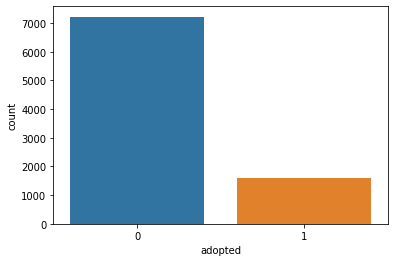

In [29]:
#How many users are considered adopted?
sns.countplot(df['adopted'])

In [30]:
df.adopted.value_counts()

0    7221
1    1602
Name: adopted, dtype: int64

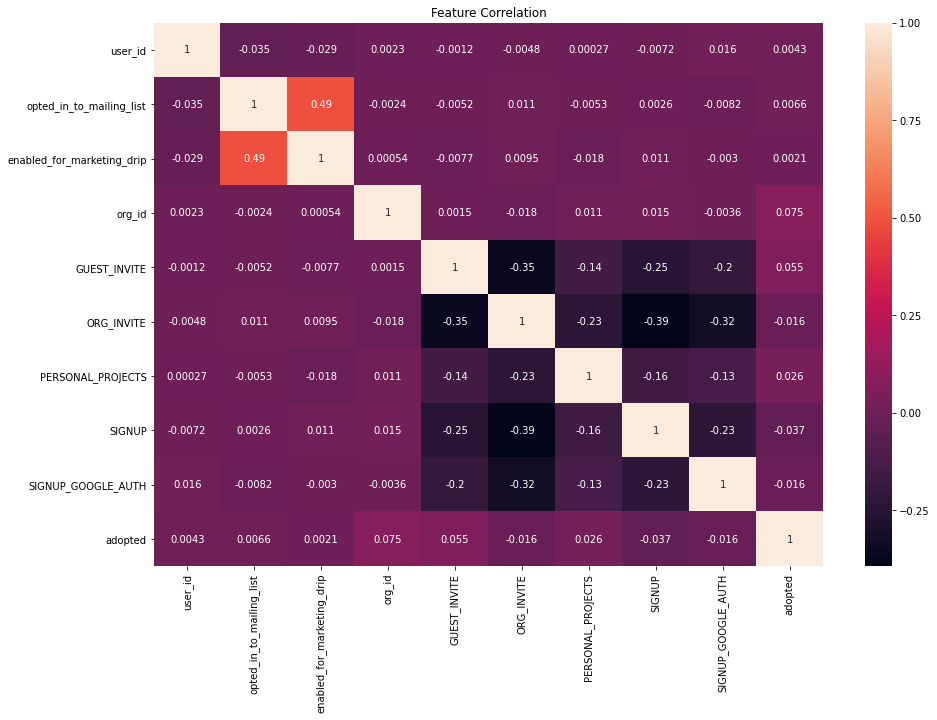

In [31]:
#Is there any correlation between features?
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.title('Feature Correlation')
plt.show()

Possible connections between marketing aspects and then an expected neagtive correlation between creation sources.

# Model

### Preprocessing

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [74]:
#Identify target and features.
X = df.drop(columns=['adopted','user_id','org_id'])
y = df['adopted']

#Scale
X = StandardScaler().fit_transform(X)

#Split into test and train
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [75]:
model = LogisticRegression()

model.fit(x_train, y_train)

C:\Users\eboci_000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
y_pred = model.predict(x_test)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1427
           1       0.00      0.00      0.00       338

    accuracy                           0.81      1765
   macro avg       0.40      0.50      0.45      1765
weighted avg       0.65      0.81      0.72      1765



C:\Users\eboci_000\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


This model predicts everyone as not adopted. This does not help with determining useful features.

In [78]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()

model2.fit(x_train, y_train)

C:\Users\eboci_000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
y2_pred = model2.predict(x_test)

In [80]:
print(classification_report(y_test, y2_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1427
           1       0.00      0.00      0.00       338

    accuracy                           0.81      1765
   macro avg       0.40      0.50      0.45      1765
weighted avg       0.65      0.81      0.72      1765



C:\Users\eboci_000\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


This model has better performance and now we can look at what the important featues are.

In [81]:
importance = model2.feature_importances_

Feature: 0, Score: 0.19697
Feature: 1, Score: 0.20634
Feature: 2, Score: 0.26965
Feature: 3, Score: 0.03443
Feature: 4, Score: 0.14727
Feature: 5, Score: 0.10355
Feature: 6, Score: 0.04181


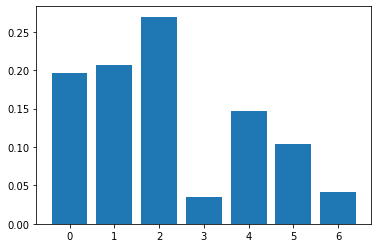

In [82]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

The most import important features are if they participate in marketing aspects, such as mailing list, and whether they were invited my another user. Possibly, the more people they know that are active, the more active they are.